# Lecture 2: Digital quantum simulation

## 2.1 The quantum circuit model

In these lecture notes, we use the terms **universal quantum computer** and the **quantum circuit model of computation** interchangeably. Quantum circuits form the foundation of quantum computation. They provide a visual and mathematical framework for representing quantum algorithms, analogous to classical logic circuits in classical computation. 

A **quantum circuit** consists of:
- **Wires**, each representing a qubit.
- **Gates**, each performing a specific unitary operation to manipulate the quantum state of the qubits.

It is depicted in a circuit diagram where:

- Horizontal lines represent qubits.
- Boxes or symbols along these lines represent quantum gates that apply specific operations.
- Time flows from left to right, illustrating the sequence of operations applied to the qubits.


We are going to use **IBM Qiskt 1.x**:

In [1]:
import qiskit
qiskit.__version__

'1.3.1'

In [4]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit import Parameter
import numpy as np

### 2.1.1 Quantum bits

**A quantum bit (qubit)** is a quantum system that has two orthonormal basis states, typically denoted as $|0\rangle$ and $|1\rangle$ in the computational basis. They are conventionally represented as vectors:

\begin{align}
    |0\rangle = \begin{pmatrix}
        1\\0
    \end{pmatrix}
    \qquad
    \text{and}
    \qquad
    |1\rangle = \begin{pmatrix}
        0\\1
    \end{pmatrix}.    
\end{align}

For $n$ qubits, the $2^n$ computational basis states can be constructed using the tensor product $\otimes$. **A quantum register** is a set of qubits used in quantum computation to store and manipulate quantum information. It is an extension of the concept of a classical register in a digital computer, which is a memory unit for storing classical bits. The bit on the left is called the **Most Significant Bit (MSB)**, while the bit on the right is known as the **Least Significant Bit (LSB)**. In the binary representation, a computational basis state is written as

\begin{align}
    |q_{n-1} q_{n-2}\cdots q_0\rangle \equiv |q_{n-1}\rangle \otimes |q_{n-2}\rangle \otimes \cdots \otimes |q_0\rangle
\end{align}

where $q_i$ takes values in $\{0, 1\}$, with $q_{n-1}$ and $q_0$ representing the MSB and LSB, respectively. This state is sometimes expressed in decimal form as $|m\rangle$ with 

$$
m=\sum\limits_{i=0}^{n-1} 2^i q_i,
$$

and is represented as a vector with its $(m+1)^{\text{th}}$ component equal to 1, while all the other components are 0. 

> In conventional textbooks like [Nielsen & Chuang, 2012](https://www.cambridge.org/9781107002173), the same state in decimal form has a different binary representation: $|j_1j_2\cdots j_{n}\rangle$.

According to the `Qiskit` convention, the MSB is positioned on **the lower bit in the circuit diagram**. For instance, in `Qiskit`, a circuit corresponding to an initial $n$-qubit state is created using:

```python
QuantumCircuit(q_0, q_1, \dots, q_{n-1})
```

where each `q_i` represents a `QuantumRegister` object. Here, `q_0` and `q_{n-1}` represent the LSB and MSB, respectively. In the circuit diagram, the wire corresponding to `q_0` appears at the top, while the wire for `q_{n-1}` is positioned at the bottom.

For example:

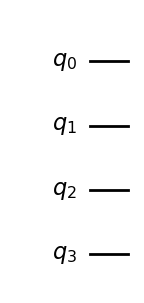

In [6]:
# Create a quantum circuit with 4 qubits
qc = QuantumCircuit(4)

# Visualize the circuit
qc.draw('mpl')

This corresponds to a state vector $|q_3q_2q_1q_0\rangle$.

**Tensor Product**

The tensor product can be implemented through the Kronecker product. Suppose $A$ is an $m \times n$ matrix, and $B$ is a $p \times q$ matrix. Then the matrix representation of their Kronecker product is given by:

\begin{align}
    A \otimes B = \begin{pmatrix}
        a_{11}B & a_{12}B & \cdots & a_{1n}B \\
        a_{21}B & a_{22}B & \cdots & a_{2n}B \\
        \vdots & \vdots & \ddots & \vdots \\
        a_{m1}B & a_{m2}B & \cdots & a_{mn}B
    \end{pmatrix}
\end{align}

where each element $a_{ij}$ of matrix $A$ is multiplied by the entire matrix $B$, forming a block matrix. In `numpy`, the Kronecker product can be computed using the function:

```python
numpy.kron(A, B)

### 2.1.2 Single-qubit gates

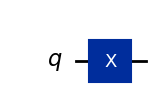

In [8]:
qc = QuantumCircuit(1,0)
qc.x(0)
x = qc.draw('mpl')
x

In [88]:
x.savefig('x.pdf')

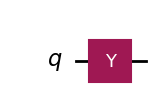

In [9]:
qc = QuantumCircuit(1,0)
qc.y(0)
y = qc.draw('mpl')
y

In [90]:
y.savefig('y.pdf')

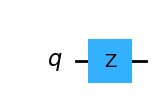

In [10]:
qc = QuantumCircuit(1,0)
qc.z(0)
z = qc.draw('mpl')
z

In [92]:
z.savefig('z.pdf')

In [11]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

In [79]:
cnot.savefig('cnot.pdf')

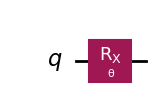

In [12]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
theta = 1.57  # Example: pi/2 radians

# Apply the Rx rotation gate
θ = Parameter('θ')
qc.rx(θ, 0)
rx = qc.draw('mpl')
rx

In [12]:
rx.savefig('rx.pdf')

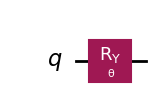

In [16]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
θ = Parameter('θ')
qc.ry(θ, 0)

# Visualize the circuit
ry = qc.draw('mpl')
ry

In [14]:
ry.savefig('ry.pdf')

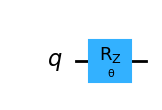

In [17]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
θ = Parameter('θ')
qc.rz(θ, 0)

# Visualize the circuit
rz = qc.draw('mpl')
rz

In [18]:
rz_gate = Operator(qc.assign_parameters({θ: np.pi/2}))
rz_gate.draw('latex')

<IPython.core.display.Latex object>

In [32]:
theta = np.pi/2
np.cos(theta/2)*np.identity(2) - 1.0j*np.sin(theta/2)*np.array([[1.0, 0.0], [0.0, -1.0]])-rz_gate.data

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [16]:
rz.savefig('rz.pdf')

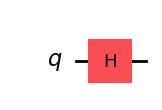

In [28]:
qc = QuantumCircuit(1)

qc.h(0)

h_gate = Operator(qc)
h = qc.draw('mpl')
h

In [29]:
h_gate.draw('latex')

<IPython.core.display.Latex object>

In [18]:
h.savefig('h.pdf')

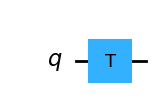

In [31]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
theta = 1.57  # Example: pi/2 radians

# Apply the Rx rotation gate
qc.t(0)
t_gate = Operator(qc)

t = qc.draw('mpl')
t

In [33]:
t_gate.draw('latex')

<IPython.core.display.Latex object>

In [24]:
t.savefig('t.pdf')

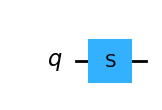

In [34]:
qc = QuantumCircuit(1)

# Define the rotation angle (theta)
theta = 1.57  # Example: pi/2 radians

# Apply the Rx rotation gate
qc.s(0)

s_gate = Operator(qc)
s = qc.draw('mpl')
s

In [35]:
s_gate.draw('latex')

<IPython.core.display.Latex object>

In [25]:
s.savefig('s.pdf')

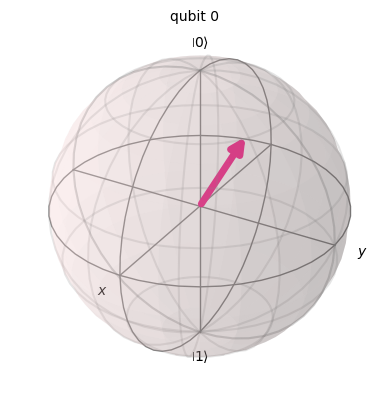

In [36]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Apply gates to set the qubit's state (adjust these gates to experiment)
theta = np.pi/5
phi = np.pi/3
qc.ry(theta, 0)
qc.rz(phi, 0)

# Get the statevector of the qubit
state = Statevector.from_instruction(qc)

# Visualize the state on the Bloch sphere
bs = plot_bloch_multivector(state.data)
bs

### 2.1.3 Two-qubit gates

The **CNOT gate** is a critical operator in quantum computing. It operates on two input qubits, known as the **control qubit** and **target qubit**. Specifically, if the control qubit is in the state \( |1\rangle \), the target qubit is flipped; otherwise, the target qubit remains unchanged. When the control qubit is the leftmost (MSB), the CNOT gate is represented as:
\begin{align}
\text{CNOT} = |0\rangle\langle0| \otimes \mathbb{1} + |1\rangle\langle1| \otimes X
\end{align}


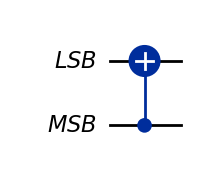

In [37]:
lsb, msb = QuantumRegister(1, 'LSB'), QuantumRegister(1, 'MSB')
qc = QuantumCircuit(lsb, msb)
qc.cx(msb, lsb)

cnot_gate = Operator(qc)
cnot = qc.draw('mpl')
cnot

In [38]:
cnot_gate.draw('latex')

<IPython.core.display.Latex object>

In [45]:
c0 = np.array([[1], [0]])
c1 = np.array([[0], [1]])
x = np.kron(c0, c1.T) + np.kron(c1, c0.T)

np.kron(np.kron(c0, c0.T), np.identity(2)) + np.kron(np.kron(c1, c1.T), x) - cnot_gate.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
cnot.savefig('cnot.pdf')

If we need to specify the control ($i$) and target ($j$) qubits of a CNOT gate, we use the notation $(\text{C}_i\text{X}_j)$. This gate can be used to create entanglement between two qubits.

Similarly, one can defined **controlled-Z (CZ) gate**:

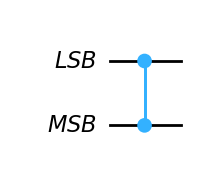

In [46]:
lsb, msb = QuantumRegister(1, 'LSB'), QuantumRegister(1, 'MSB')
qc = QuantumCircuit(lsb, msb)
qc.cz(msb, lsb)

cz_gate = Operator(qc)
cz = qc.draw('mpl')
cz

In [47]:
cz_gate.draw('latex')

<IPython.core.display.Latex object>

In [6]:
cz.savefig('cz.pdf')

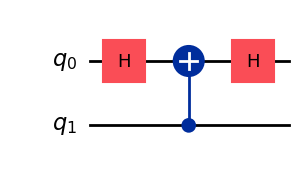

In [50]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(1, 0)
qc.h(0)
cz = qc.draw('mpl')
cz

In [51]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
cz.savefig('cz_from_cnot.pdf')

The **SWAP gate**:

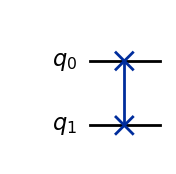

In [48]:
# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply the SWAP gate
qc.swap(0, 1)

# Extract and print the SWAP gate matrix
swap_matrix = Operator(qc)

# Visualize the circuit
swap = qc.draw('mpl')
swap

In [49]:
swap_matrix.draw('latex')

<IPython.core.display.Latex object>

In [9]:
swap.savefig('swap.pdf')

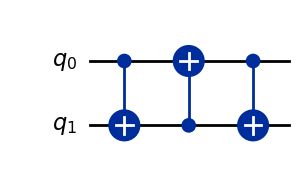

In [52]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
swap = qc.draw('mpl')
swap

In [53]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

In [ ]:
swap.savefig('swap_from_cnot.pdf')

### 2.1.4 Measurement

Measurement is a fundamental concept in quantum computing, serving as the primary mechanism for extracting information from quantum systems. Unlike classical systems, where a system's state can be observed without alteration, quantum measurement is inherently probabilistic and inevitably affects the state being measured. Upon measurement, the wave function of a quantum system collapses into an eigenstate of the corresponding Hermitian operator, making measurement an irreversible operation.\footnote{Decoherence can be understood as the undesired interaction between a quantum system and its environment, effectively acting as an unintended measurement of the system's state.}

In more detail, one can identify **a complete set of commuting observables** (Hermitian operators), whose eigenstates, denoted as $|m\rangle$, form a complete basis for the system's Hilbert space. Specifically, this completeness is expressed as
\begin{equation}
    \sum\limits_m |m\rangle\langle m| = \mathbb{1}.
\end{equation}
After measurement, the state of the system collapses into one of these eigenstates, given by
\begin{equation}
    \frac{|m\rangle\langle m|\psi\rangle}{\sqrt{\langle\psi|m\rangle\langle m|\psi\rangle}},
\end{equation}
with a probability
\begin{equation}
    p(m) = \langle\psi|m\rangle\langle m|\psi\rangle.
\end{equation}
This is the **measurement postulate** of quantum mechanics.

A classical measurement in the computational basis on a qubit collapse its state into either $|0\rangle$ or $|1\rangle$. In this case, one has the completeness relation $|0\rangle\langle 0| + |1\rangle\langle 1| = \mathbb{1}$.  In circuit diagrams, this operation is represented by a meter symbol, commonly referred to as a **READOUT/measurement gate**. Note that a measurement of a single qubit in any basis can be achieved by performing a measurement in the computational basis, preceded and followed by appropriate unitary transformations.

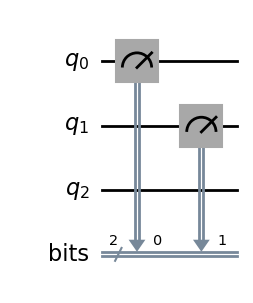

In [54]:
qbit, cbit = QuantumRegister(3, 'q'), ClassicalRegister(2, 'bits')
qc = QuantumCircuit(qbit, cbit)
qc.measure(qbit[:len(cbit)], cbit)
me = qc.draw('mpl')
me

In [ ]:
me.savefig('measure.pdf')

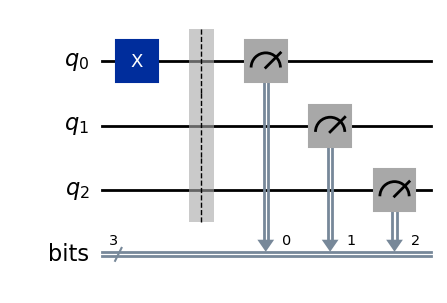

In [56]:
qbit, cbit = QuantumRegister(3, 'q'), ClassicalRegister(3, 'bits')
qc = QuantumCircuit(qbit, cbit)
qc.x(0)
qc.barrier()
qc.measure(qbit[:len(cbit)], cbit)
me = qc.draw('mpl')
me

In [63]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.primitives import StatevectorSampler

In [64]:
simulator = BasicSimulator()
sampler = StatevectorSampler()

probs = simulator.run(qc, shots=1).result()
print(probs.get_counts())

{'001': 1}


# 2.2 Simulations of quantum systems

## Example 2.1

Consider a two-fermion system described by the Hamiltonian:  
\begin{align}
    \hat{H} = X \otimes Y,
\end{align}
with the initial state given by $|\psi(0)\rangle = |10\rangle $.

To implement $\hat{U}(t)$ using circuits, one can write
\begin{align}
    \hat{U}(t) = A (C_1 X_0) e^{-it\mathbb{1}\otimes Z}(C_1X_0) A
    ^\dagger
    = A (C_1 X_0) (\mathbb{1}\otimes R_z(2t))(C_1X_0) A
    ^\dagger
\end{align}
with the unitary operator
\begin{align}
    A \equiv H\otimes SH.
\end{align}

In [9]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.providers.basic_provider import BasicSimulator

### The circuit

The evolution opeator:  $\hat{U}(t) = e^{-i\hat{H}t} = \cos(t) - i \sin(t) \, X \otimes Y$

In [2]:
def U(t):
    """
    return the evoltuion operator in the matrix form
    """
    X = np.matrix([[0,1],[1,0]])
    Y = np.matrix([[0,-1j],[1j,0]])
    return np.cos(t)*np.identity(4) - 1.0j*np.sin(t)*np.kron(X, Y)

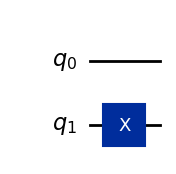

In [3]:
# 1. State preparation

psi0 = QuantumCircuit(2)
psi0.x(1)

psi0.draw('mpl')

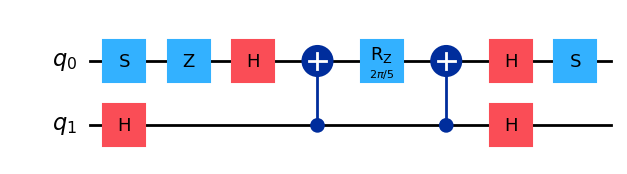

In [4]:
# 2. Time evolution

t = np.pi/5

ut = QuantumCircuit(2)

# A^\dagger = H \otimes H S^\dagger = H Z S
ut.h(1)
ut.s(0)
ut.z(0)
ut.h(0)

ut.cx(1, 0)
ut.rz(2*t, 0)
ut.cx(1, 0)

# A = H \otimes S H
ut.h(1)
ut.h(0)
ut.s(0)

ut.draw('mpl')

In [5]:
U_gate = Operator(ut).data
np.abs(U_gate - U(t)) > 1e-15

matrix([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Measurement in the Bell basis is fulfilled by performing a "sandwiched" measurement in the computational basis between \( B \) and \( B^\dagger = (H \otimes \mathbb{1})(C_1 X_0) \). The outputs: $00, 01, 10, 11$ correspond to $|\phi^+\rangle, |\psi^+\rangle, |\phi^-\rangle$ and $|\psi^-\rangle$, respectively.

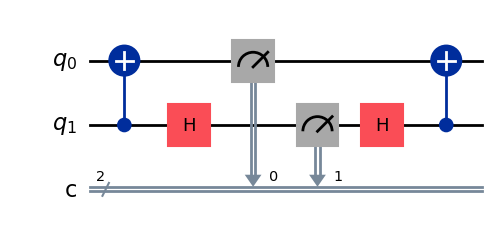

In [6]:
# 3. Measurement
qbits, cbits = QuantumRegister(2, 'q'), ClassicalRegister(2, 'c')

mea = QuantumCircuit(qbits, cbits)

# B^\dagger
mea.cx(1, 0)
mea.h(1)

mea.measure(qbits, cbits)

# B
mea.h(1)
mea.cx(1, 0)

mea.draw('mpl')

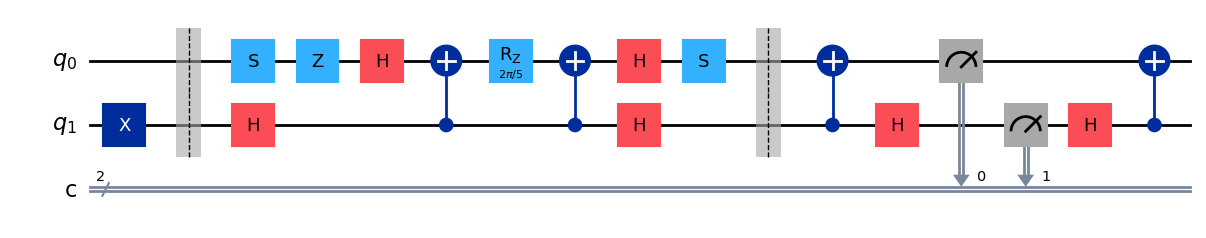

In [7]:
qc = psi0.copy()
qc.barrier()
qc = qc.compose(ut)
qc.barrier()
qc = qc.compose(mea)

cplot = qc.draw('mpl')
cplot

In [24]:
cplot.savefig('circuit_XY.pdf')

### Execute on simulator

In [18]:
from qiskit_ibm_runtime import Sampler, QiskitRuntimeService

In [10]:
ss = 5120
backend = BasicSimulator()
job_simulator = backend.run(transpile(qc), shots=ss)
result_simulator = job_simulator.result()

In [11]:
counts = result_simulator.get_counts()
print(counts)

{'01': 4997, '11': 123}


In [12]:
(1.0 - np.sin(2*t))/2.0, (1.0 + np.sin(2*t))/2.0

(0.024471741852423234, 0.9755282581475768)

In [51]:
maps = {'00': r'$|\phi^+\rangle$', '01': r'$|\psi^+\rangle$', '10': r'$|\phi^-\rangle$', '11': r'$|\psi^-\rangle$'}

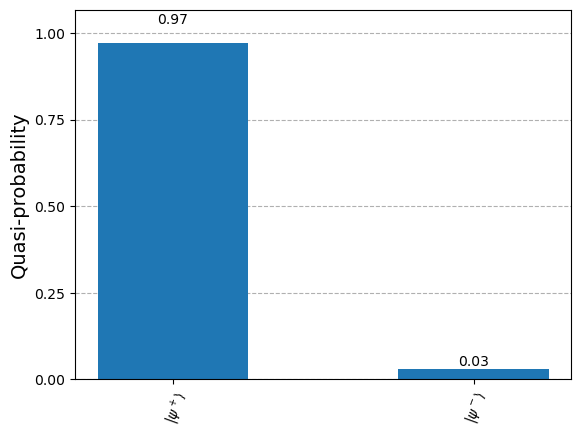

In [52]:
results = {}
for state in counts.keys():
    results[maps[state]] = counts[state]/ss
res = plot_histogram(results)
res

In [154]:
res.savefig('results_XY_simulator.pdf')

### Execute on Quantum backend

In [ ]:
QiskitRuntimeService.save_account(
    token='9cabcfcc5e97e81690870dec6da2366416e2529ba0207644ce0380a587e4cd08564ff23336e3249849fe61800013a7b1c3ec7d29325a3e1f24c447e8d0f94bc4',
    channel='ibm_quantum',
    overwrite=True
)

In [14]:
provider = QiskitRuntimeService()

In [15]:
provider.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [19]:
backend_QC = provider.backend('ibm_brisbane')
sampler_qc = Sampler(backend_QC)

In [20]:
pub = (transpile(qc, backend=backend_QC), None, ss)
job_QC = sampler_qc.run([pub])
result_QC = job_QC.result()

In [22]:
job_QC

<RuntimeJobV2('cy1bsc5rta1g0086p240', 'sampler')>

In [30]:
counts = result_QC[0].data['c'].get_counts()
counts

{'11': 205, '01': 4800, '00': 66, '10': 49}

In [28]:
maps = {'00': r'$|\phi^+\rangle$', '01': r'$|\psi^+\rangle$', '10': r'$|\phi^-\rangle$', '11': r'$|\psi^-\rangle$'}

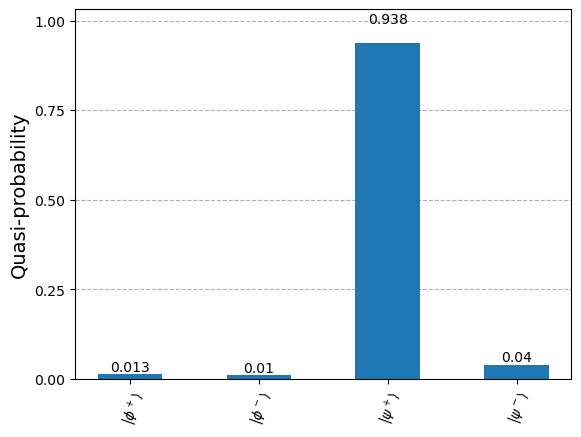

In [31]:
results = {}
for state in counts.keys():
    results[maps[state]] = counts[state]/ss
res = plot_histogram(results)
res

In [32]:
res.savefig('results_XY_ibm_brisbane.pdf')